In [1]:
# Importing Libraries

import tweepy
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Read the file already created by using twitters api

df = pd.read_csv('trends_12-12-2018.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Country_code,Country_woeid,City,City_woeid,trend_1,trend_2,trend_3,trend_4,trend_5
0,0,Canada,CA,23424775,Winnipeg,2972,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
1,1,Canada,CA,23424775,Ottawa,3369,icarusfallsparty,Centre Block,WeTheNorth,House of Commons,climatechange
2,2,Canada,CA,23424775,Quebec,3444,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
3,3,Canada,CA,23424775,Montreal,3534,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
4,4,Canada,CA,23424775,Toronto,4118,FoxKatZ1035,Sarnia,Brampton,Warriors,2018In5Words


In [5]:
# Trends in all available cities of a Country

df.loc[df['Country']=='Pakistan']

,Unnamed: 0,Country,Country_code,Country_woeid,City,City_woeid,trend_1,trend_2,trend_3,trend_4,trend_5
293,293,Pakistan,PK,23424922,Karachi,2211096,KhaadiTurns20,SupremeCourt,morethanmilk,NawazSharif,NFO2018
294,294,Pakistan,PK,23424922,Lahore,2211177,SupremeCourt,NationalT20Cup,KhawajaSaadRafique,NawazSharif,KhaadiTurns20
295,295,Pakistan,PK,23424922,Multan,2211269,PP168,KhaadiTurns20,Shahbaz Sharif,aleemakhan,NawazSharif
296,296,Pakistan,PK,23424922,Rawalpindi,2211387,PP168,KhaadiTurns20,Shahbaz Sharif,aleemakhan,NawazSharif
297,297,Pakistan,PK,23424922,Faisalabad,2211574,PP168,KhaadiTurns20,Shahbaz Sharif,aleemakhan,NawazSharif


In [6]:
# Search Top5 trends of a city

def search_city(city_name):
    return df.loc[df['City']==city_name,['trend_1','trend_2','trend_3','trend_4','trend_5']]
search_city('Delhi')                                                 #  Change the name of city here

,trend_1,trend_2,trend_3,trend_4,trend_5
399,INDvNED,JusticeForArindom,SPSTrailer,RafaleDeal,GullyBoy


In [8]:
# Separating Country and trends

df_country = df[['Country','trend_1','trend_2','trend_3','trend_4','trend_5']]
df_country.head()

,Country,trend_1,trend_2,trend_3,trend_4,trend_5
0,Canada,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
1,Canada,icarusfallsparty,Centre Block,WeTheNorth,House of Commons,climatechange
2,Canada,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
3,Canada,Québécoise,ThursdayThoughts,PoweringPastCoal,Fred Pellerin,Charlemagne
4,Canada,FoxKatZ1035,Sarnia,Brampton,Warriors,2018In5Words


In [9]:
# Grouping by Countries (to remove multiple Country rows) and converting the trends of a country into one list 
# for each of the five trends

df_country=df_country.groupby(['Country']).agg(lambda x: tuple(x)).applymap(list).reset_index()
df_country.head()

,Country,trend_1,trend_2,trend_3,trend_4,trend_5
0,Algeria,[Tunisie],[Maroc],[Alger],[TeamDZ],[football]
1,Argentina,"[MiraComoNosPonemos, BuenJueves, MiraComoNosPo...","[BuenJueves, MiraComoNosPonemos, BuenJueves, D...","[Gianfranco Macri, Darthes, Gianfranco Macri, ...","[Puente Pueyrredón, Gianfranco Macri, FelizCum...","[FelizCumpleCalo, FelizCumpleCalo, Puente Puey..."
2,Australia,"[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY...","[ICARUSFALLS, FIVEaaNews, ICARUSFALLS, Canberr...","[BumblebeeMovie, SmallzysSurgery, BumblebeeMov...","[2018In5Words, south australia, 2018In5Words, ...","[sydneystorm, Adelaide, sydneystorm, greens, s..."
3,Austria,[OeNR],[SCRRFC],[schwarzblau],[strasbourg],[sozialversicherung]
4,Belarus,"[Dota2, Dota2, Dota2, Dota2]","[Москве, Москве, Москве, Москве]","[Республики Беларусь, Республики Беларусь, Рес...","[Брестской, Брестской, Брестской, Брестской]","[В Минске, В Минске, В Минске, В Минске]"


In [11]:
# Combining all five trends of a country into one column "all_trends"

df_country['all_trends'] = df_country[['trend_1', 'trend_2', 'trend_3', 'trend_4', 'trend_5']].values.tolist()
df_country.head()

,Country,trend_1,trend_2,trend_3,trend_4,trend_5,all_trends
0,Algeria,[Tunisie],[Maroc],[Alger],[TeamDZ],[football],"[[Tunisie], [Maroc], [Alger], [TeamDZ], [footb..."
1,Argentina,"[MiraComoNosPonemos, BuenJueves, MiraComoNosPo...","[BuenJueves, MiraComoNosPonemos, BuenJueves, D...","[Gianfranco Macri, Darthes, Gianfranco Macri, ...","[Puente Pueyrredón, Gianfranco Macri, FelizCum...","[FelizCumpleCalo, FelizCumpleCalo, Puente Puey...","[[MiraComoNosPonemos, BuenJueves, MiraComoNosP..."
2,Australia,"[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY...","[ICARUSFALLS, FIVEaaNews, ICARUSFALLS, Canberr...","[BumblebeeMovie, SmallzysSurgery, BumblebeeMov...","[2018In5Words, south australia, 2018In5Words, ...","[sydneystorm, Adelaide, sydneystorm, greens, s...","[[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, S..."
3,Austria,[OeNR],[SCRRFC],[schwarzblau],[strasbourg],[sozialversicherung],"[[OeNR], [SCRRFC], [schwarzblau], [strasbourg]..."
4,Belarus,"[Dota2, Dota2, Dota2, Dota2]","[Москве, Москве, Москве, Москве]","[Республики Беларусь, Республики Беларусь, Рес...","[Брестской, Брестской, Брестской, Брестской]","[В Минске, В Минске, В Минске, В Минске]","[[Dota2, Dota2, Dota2, Dota2], [Москве, Москве..."


In [12]:
# Convert list of lists in one list

df_country['all_trends']= df_country['all_trends'].apply(lambda lists: [elem for lst in lists for elem in lst])
df_country.head()

,Country,trend_1,trend_2,trend_3,trend_4,trend_5,all_trends
0,Algeria,[Tunisie],[Maroc],[Alger],[TeamDZ],[football],"[Tunisie, Maroc, Alger, TeamDZ, football]"
1,Argentina,"[MiraComoNosPonemos, BuenJueves, MiraComoNosPo...","[BuenJueves, MiraComoNosPonemos, BuenJueves, D...","[Gianfranco Macri, Darthes, Gianfranco Macri, ...","[Puente Pueyrredón, Gianfranco Macri, FelizCum...","[FelizCumpleCalo, FelizCumpleCalo, Puente Puey...","[MiraComoNosPonemos, BuenJueves, MiraComoNosPo..."
2,Australia,"[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY...","[ICARUSFALLS, FIVEaaNews, ICARUSFALLS, Canberr...","[BumblebeeMovie, SmallzysSurgery, BumblebeeMov...","[2018In5Words, south australia, 2018In5Words, ...","[sydneystorm, Adelaide, sydneystorm, greens, s...","[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY..."
3,Austria,[OeNR],[SCRRFC],[schwarzblau],[strasbourg],[sozialversicherung],"[OeNR, SCRRFC, schwarzblau, strasbourg, sozial..."
4,Belarus,"[Dota2, Dota2, Dota2, Dota2]","[Москве, Москве, Москве, Москве]","[Республики Беларусь, Республики Беларусь, Рес...","[Брестской, Брестской, Брестской, Брестской]","[В Минске, В Минске, В Минске, В Минске]","[Dota2, Dota2, Dota2, Dota2, Москве, Москве, М..."


In [13]:
# Creating a dictionary for frequency of each trend list in "all_trends" column

df_country['freq_dict'] = df_country.all_trends.apply(lambda lists : Counter(lists))
df_country.head()

,Country,trend_1,trend_2,trend_3,trend_4,trend_5,all_trends,freq_dict
0,Algeria,[Tunisie],[Maroc],[Alger],[TeamDZ],[football],"[Tunisie, Maroc, Alger, TeamDZ, football]","{'TeamDZ': 1, 'Tunisie': 1, 'football': 1, 'Al..."
1,Argentina,"[MiraComoNosPonemos, BuenJueves, MiraComoNosPo...","[BuenJueves, MiraComoNosPonemos, BuenJueves, D...","[Gianfranco Macri, Darthes, Gianfranco Macri, ...","[Puente Pueyrredón, Gianfranco Macri, FelizCum...","[FelizCumpleCalo, FelizCumpleCalo, Puente Puey...","[MiraComoNosPonemos, BuenJueves, MiraComoNosPo...","{'Navarro2019': 1, 'Darthes': 2, 'BuenJueves':..."
2,Australia,"[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY...","[ICARUSFALLS, FIVEaaNews, ICARUSFALLS, Canberr...","[BumblebeeMovie, SmallzysSurgery, BumblebeeMov...","[2018In5Words, south australia, 2018In5Words, ...","[sydneystorm, Adelaide, sydneystorm, greens, s...","[SYDvADL, SYDvADL, SYDvADL, ASPAs, SYDvADL, SY...","{'SmallzysSurgery': 1, 'greens': 1, 'FIVEaaNew..."
3,Austria,[OeNR],[SCRRFC],[schwarzblau],[strasbourg],[sozialversicherung],"[OeNR, SCRRFC, schwarzblau, strasbourg, sozial...","{'schwarzblau': 1, 'OeNR': 1, 'strasbourg': 1,..."
4,Belarus,"[Dota2, Dota2, Dota2, Dota2]","[Москве, Москве, Москве, Москве]","[Республики Беларусь, Республики Беларусь, Рес...","[Брестской, Брестской, Брестской, Брестской]","[В Минске, В Минске, В Минске, В Минске]","[Dota2, Dota2, Dota2, Dota2, Москве, Москве, М...","{'Dota2': 4, 'Брестской': 4, 'Республики Белар..."


In [14]:
# Selecting the trends with a frequency of 10 or above for each country and removing the remaining countries
# This way we will get a good visualization of only the trends that are more frequent in most cities of a country

df_test = df_country[['Country','freq_dict']]
df_test['good_freq'] = df_test.freq_dict.apply(lambda f: { k: v for k, v in f.items() if v >= 10 })
df_test= df_test[df_test.good_freq != {}]
df_test.head()

C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,freq_dict,good_freq
5,Brazil,"{'Natal': 1, 'FestaFinalAFazenda': 3, 'Aquaman...","{'AI-5': 10, 'ItsTheLoveShot': 10}"
13,Germany,"{'COP24': 1, 'TSVG': 1, 'Straßburg': 1, 'hhbue...",{'2018In5Words': 10}
17,India,"{'RafaleDeal': 1, 'mrmajnu': 1, 'Markets': 1, ...","{'SPSTrailer': 20, 'JusticeForArindom': 12, 'A..."
18,Indonesia,"{'MenparGatheringBeijing': 11, 'PesonaWisataBI...","{'MenparGatheringBeijing': 11, 'PesonaWisataBI..."
22,Japan,"{'忘年会': 1, '自分のPixivブクマTOP3をあげる': 20, 'Prince ...","{'黄昏流星群': 19, 'ヤマトイオリ': 16, 'リーガルV': 16, '自分のP..."


In [15]:
# Converting the frequencies, trends and countries into lists for plotting the graph 

test_freq=[]
test_trnds=[]
test_count = []
#df_test.iloc[0]['good_freq']
for i in range(0,df_test.shape[0]):
    test_freq.append(df_test.iloc[i]['good_freq'].values())
    test_trnds.append(df_test.iloc[i]['good_freq'].keys())
    for j in range(0,len(df_test.iloc[i]['good_freq'])):
        test_count.append(df_test.iloc[i]['Country'])

test_freq = [elem for lst in test_freq for elem in lst]
test_trnds = [elem for lst in test_trnds for elem in lst]

C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


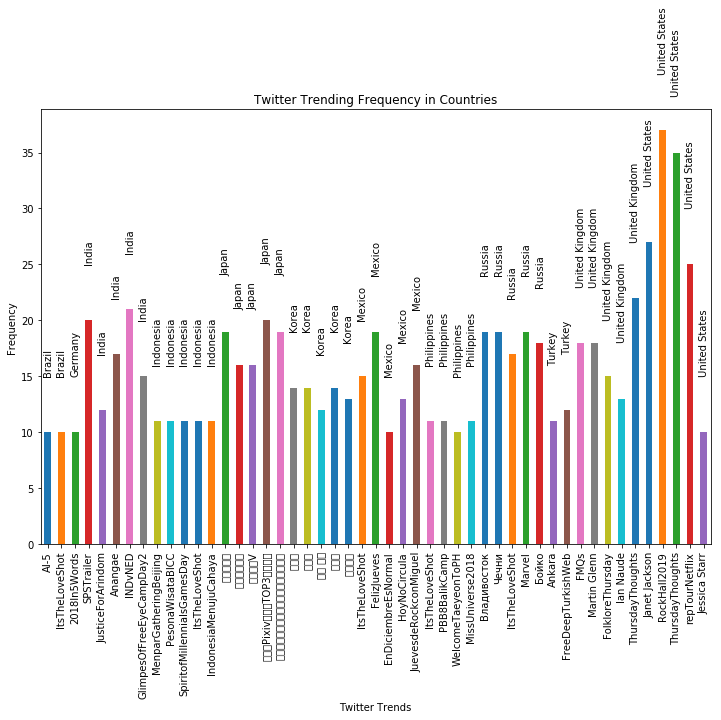

In [25]:
# Plot bar graph for frequency vs trends with country lists as labels

freq_series = pd.Series.from_array(test_freq)
fig = plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Twitter Trending Frequency in Countries')
ax.set_xlabel('Twitter Trends')
ax.set_ylabel('Frequency')
ax.set_xticklabels(test_trnds)

rects = ax.patches

# Make some labels.
labels = test_count

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', rotation=90)
plt.show()

In [26]:
fig.savefig('Twitter_trends.jpg')